<a href="https://colab.research.google.com/github/SulavJ/bigdata_assignments/blob/master/12_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MNIST with CNN**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [0]:
#input image dimensions
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
num_classes = 10

In [0]:
#the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28)


In [0]:
#the color is encoded as a number from 0 to 255 
x_train[0]

In [8]:
#keras wants the picture not in the 3D tensor but 4D tensor
#first dimension is the different pictures
#second and third dimensions are the 28x28 x and y axis of the picture
#reshape train and test data to 4D tensor

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [10]:
#gray scale encodes an integer between 0 to 255
# the neural network needs it as a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#We rescale the tensor so that the nummbers are between 0 and 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


true class: 1


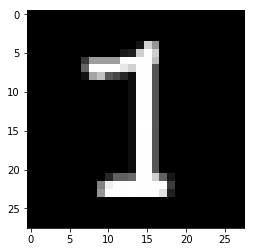

In [18]:
#let us look at an example

img_index = 45666
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index], (28,28)), cmap='gray')

In [0]:
#convert class vectors to one-hot encoded binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

true class: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


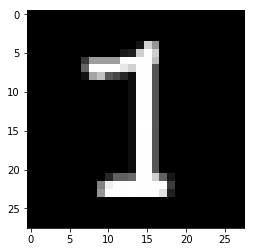

In [23]:
#lets again show the picture with the true class. 
img_index = 45666
print("true class:", y_train[img_index])
plt.imshow(np.reshape(x_train[img_index], (28,28)), cmap = 'gray')

In [0]:
#Create a Sequential Model 
#Add Convolutional Layer with 32 kernels, each with the size 3x3, use Relu as the activation function
#Add another Convolutional Layer with the 64 Kernels, each with the size 3x3, use Relu as the activation function
#Add a max pooling layer with pool size of 2x2 
#Add then a Dropout of 25%
#Add then a Flatten Operator to get a one dimensional vector
#Add a dense layer with 128 node and Relu activation
#Add then a Dropout of 50%
#Finally add a dense layer for the output. Think about the nummber of nodes and the activation function you need. 


model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax')) #10 because we have 10 digits and softmax

In [0]:
#compile the model
#Think about the appropriate loss function
#Use as the Optimizer Adadelta
#Add as another metric Accuracy 

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])



In [51]:
# fit the model 
# save the learning history in a variable history 
# use batch size 128, and 12 epochs

history = model.fit(x_train, y_train, batch_size = 128, epochs = 12, validation_data = (x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 86us/step - loss: 0.0174 - acc: 0.9944 - val_loss: 0.0323 - val_acc: 0.9926
Epoch 2/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.0172 - acc: 0.9944 - val_loss: 0.0307 - val_acc: 0.9915
Epoch 3/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0165 - acc: 0.9945 - val_loss: 0.0253 - val_acc: 0.9932
Epoch 4/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0162 - acc: 0.9947 - val_loss: 0.0303 - val_acc: 0.9931
Epoch 5/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0155 - acc: 0.9948 - val_loss: 0.0323 - val_acc: 0.9913
Epoch 6/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0146 - acc: 0.9954 - val_loss: 0.0305 - val_acc: 0.9927
Epoch 7/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0150 - acc: 0.9953 - val_loss: 0.0331 - val_acc

In [52]:
#Test the model based on the test data
#Print the test loss and test accuracy

score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

10000/10000 [==============================] - 1s 65us/step
Test Loss: 0.03014596574436723
Test Accuracy: 0.9923


In [53]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


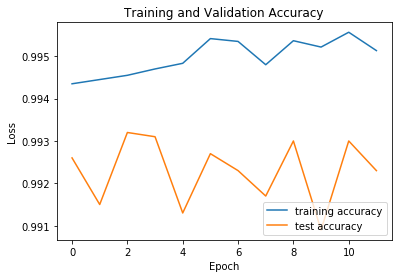

In [54]:
#Create a plot to show training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training accuracy', 'Validation accuracy'], loc='lower right')
plt.show()

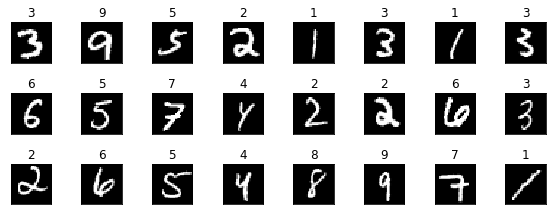

In [57]:
# Shows Test Pictures and predicted class
grid_x = 8
grid_y = 3
plt.figure(figsize=(1*grid_x, 2*grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2*grid_y, grid_x, 1+plt_index)
        img_index = index+500
        pred_data = np.reshape(x_test[img_index], (1, 28, 28, 1))
        pred = model.predict(pred_data, verbose=0)
        plt.imshow(np.reshape(x_test[img_index],(28,28)),cmap='gray')
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(str(np.argmax(pred)))
plt.tight_layout()
plt.show()

In [50]:
#Show model summary
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________